# **TikTok Project**
**Regression Analysis**

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, we have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

# **Regression modeling**


In this activity, we will build a logistic regression model to help estimate the probability of an outcome.

<br/>

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions

**Part 2:** Model Building and Evaluation

**Part 3:** Interpreting Model Results


# **Build a regression model**

# **PACE stages**

## PACE: **Plan**

### **Task 1. Imports and loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load dataset into dataframe
data = pd.read_csv(r"C:\Users\spectre\Downloads\tiktok_dataset.csv")

## **PACE: Analyze**


### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

In [3]:
# Display first few rows
data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Keeping `data` as the original dataframe and creating a copy (df) where changes will go
# Can revert `df` to `data` if needed down the line
df = data.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
df.info()

(19382, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
# Get number of rows and columns
df.shape

(19382, 12)

In [6]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [7]:
# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (19382, 12)
Shape of dataframe with duplicates dropped: (19382, 12)
Total count of missing values: 2086
Missing values per column:


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [8]:
# Display first few rows after handling missing values
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle outliers.

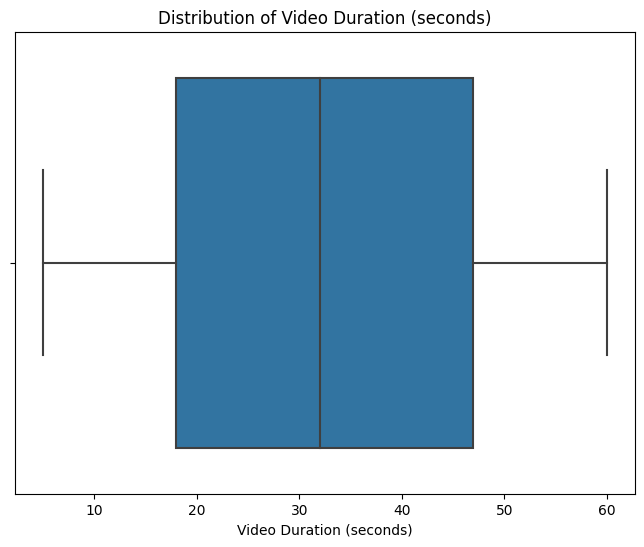

In [9]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['video_duration_sec'])
plt.title('Distribution of Video Duration (seconds)')
plt.xlabel('Video Duration (seconds)')
plt.show()

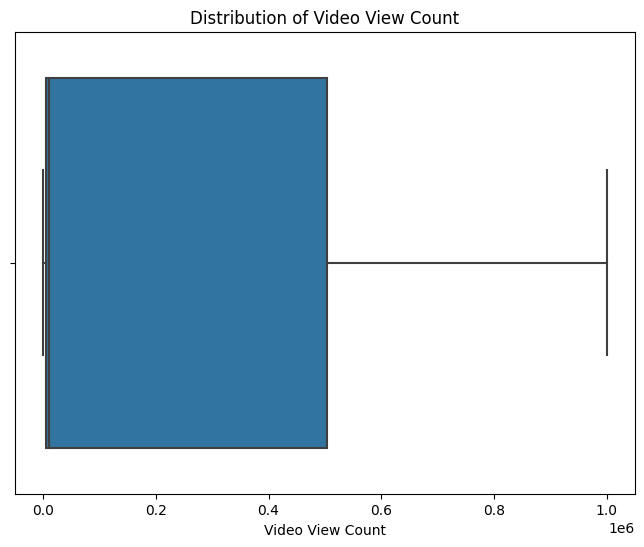

In [10]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['video_view_count'])
plt.title('Distribution of Video View Count')
plt.xlabel('Video View Count')
plt.show()

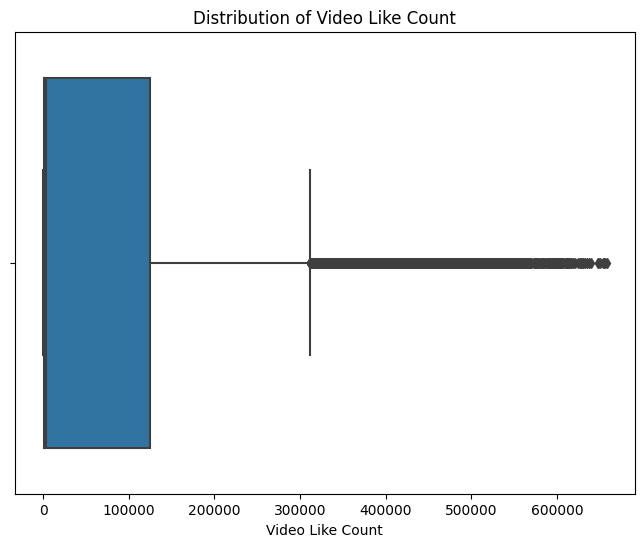

In [11]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['video_like_count'])
plt.title('Distribution of Video Like Count')
plt.xlabel('Video Like Count')
plt.show()

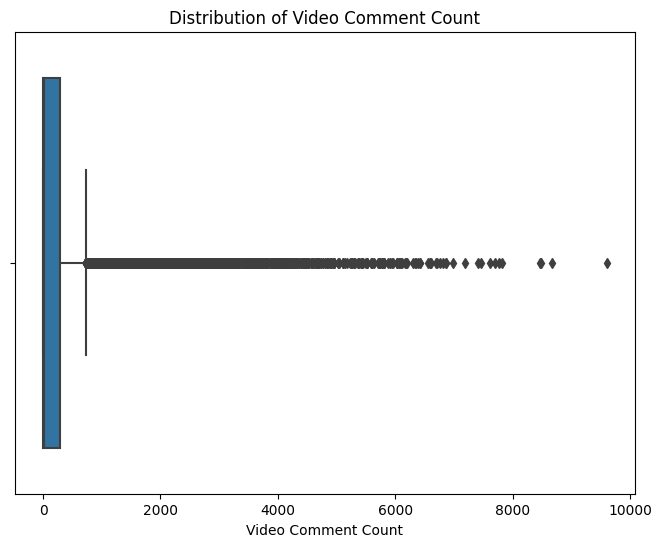

In [25]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['video_comment_count'])
plt.title('Distribution of Video Comment Count')
plt.xlabel('Video Comment Count')
plt.show()

In [12]:
# Check for and handle outliers for video_like_count
percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [13]:
# Check for and handle outliers for video_comment_count
percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

Check class balance.

In [14]:
# Check class balance for video_comment_count
df["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.936023
verified        0.063977
Name: proportion, dtype: float64

`Note` Approximately 94% of the dataset represents videos posted by unverified accounts and 6% represents videos posted by verified accounts. So the outcome variable is not very balanced.

We will use resampling to create class balance in the outcome variable, if needed.

In [15]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = df[df["verified_status"] == "not verified"]
data_minority = df[df["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                   replace=True,                   # Sample with replacement
                                   n_samples=len(data_majority),   # Match number in majority class
                                   random_state=0)                 # Reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    18142
verified        18142
Name: count, dtype: int64

Let's get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.

In [16]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda x: np.mean(x.str.len()))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.546460


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [17]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].str.len()

In [18]:
# Display first few rows of dataframe after adding new column
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128.0


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

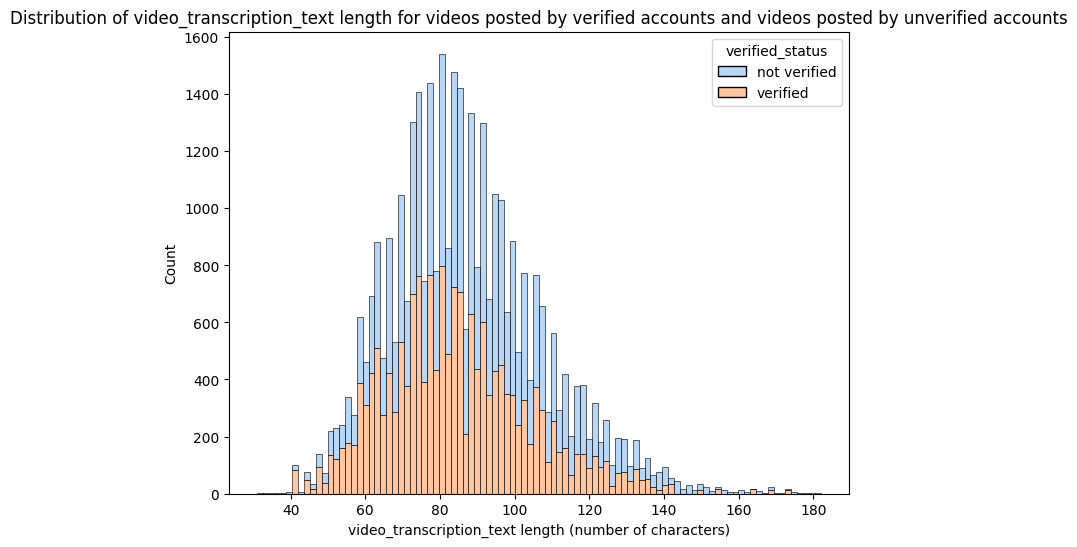

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel",
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

### **Task 2b. Examine correlations**

In [20]:
# Code a correlation matrix to help determine most correlated variables
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,0.000611,-0.011812,-0.696840,-0.581018,-0.503479,-0.486610,-0.413404,-0.194981
video_id,0.000611,1.000000,0.016749,0.002295,0.006320,0.010284,0.008621,0.014072,-0.007075
video_duration_sec,-0.011812,0.016749,1.000000,0.013686,0.005017,0.002196,0.003943,-0.004629,-0.003149
video_view_count,-0.696840,0.002295,0.013686,1.000000,0.832536,0.710653,0.689695,0.583114,0.245245
video_like_count,-0.581018,0.006320,0.005017,0.832536,1.000000,0.849722,0.827922,0.705900,0.202425
video_share_count,-0.503479,0.010284,0.002196,0.710653,0.849722,1.000000,0.709970,0.619963,0.171820
video_download_count,-0.486610,0.008621,0.003943,0.689695,0.827922,0.709970,1.000000,0.857575,0.173452
video_comment_count,-0.413404,0.014072,-0.004629,0.583114,0.705900,0.619963,0.857575,1.000000,0.149658
text_length,-0.194981,-0.007075,-0.003149,0.245245,0.202425,0.171820,0.173452,0.149658,1.000000


Visualize a correlation heatmap of the data.

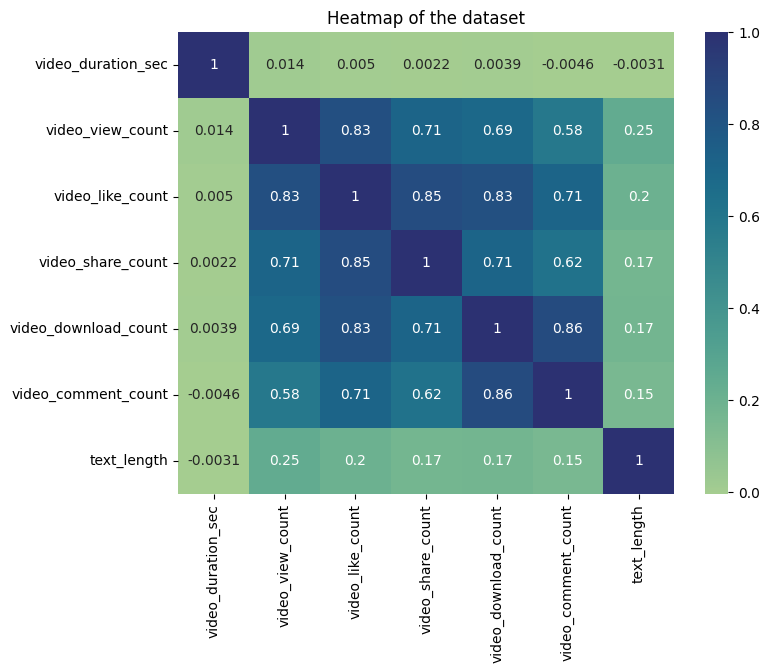

In [21]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

`Note`: The above heatmap shows that the following pair of variables are highly correlated: `video_comment_count` and `video_download_count` (0.86 correlation coefficient).
<br> We have to remove one of these variables from the model, as multicollinearity can affect the model, we will remove `video_download_count` from the model.

We will keep the following variables in the model: `video_view_count`; `video_like_count`; `video_share_count`; `video_comment_count`.

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

### **Task 3a. Select variables**

Setting Y and X variables.

In [22]:
# Select outcome variable
y = data_upsampled["verified_status"]

Select the features.

In [23]:
# Select features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_like_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_like_count,video_comment_count
0,59,claim,under review,343296.0,241.0,19425.0,0.0
1,32,claim,active,140877.0,19034.0,77355.0,684.0
2,31,claim,active,902185.0,2858.0,97690.0,329.0
3,25,claim,active,437506.0,34812.0,239954.0,584.0
4,19,claim,active,56167.0,4110.0,34987.0,152.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [25]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27213, 7), (9071, 7), (27213,), (9071,))

`Note`: 
- The number of features (`7`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`27213`) and testing (`9071`).

### **Task 3c. Encode variables**

Check the data types of the features.

In [26]:
# Check data types
X_train.dtypes

video_duration_sec       int64
claim_status            object
author_ban_status       object
video_view_count       float64
video_share_count      float64
video_like_count       float64
video_comment_count    float64
dtype: object

In [27]:
# Get unique values in `claim_status`
X_train["claim_status"].unique()

array(['claim', 'opinion', nan], dtype=object)

In [28]:
# Get unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [29]:
# Select the training features that needs to be encoded
X_train_cat = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_cat.head()

,claim_status,author_ban_status
4691,claim,active
11044,opinion,active
27335,opinion,active
575,claim,active
19733,opinion,active


In [30]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [31]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_cat)

In [32]:
# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'claim_status_nan',
       'author_ban_status_banned', 'author_ban_status_under review'],
      dtype=object)

In [33]:
# Display first few rows of encoded training features
X_train_encoded

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [34]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,claim_status_nan,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [35]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_like_count,video_comment_count
4691,59,922147.0,74619.0,241497.0,3753.0
11044,22,2476.0,3.0,44.0,0.0
27335,12,4235.0,3.0,8.0,0.0
575,27,218127.0,18985.0,60700.0,79.0
19733,27,8019.0,287.0,3153.0,1.0


In [36]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_like_count,video_comment_count,claim_status_opinion,claim_status_nan,author_ban_status_banned,author_ban_status_under review
0,59,922147.0,74619.0,241497.0,3753.0,0.0,0.0,0.0,0.0
1,22,2476.0,3.0,44.0,0.0,1.0,0.0,0.0,0.0
2,12,4235.0,3.0,8.0,0.0,1.0,0.0,0.0,0.0
3,27,218127.0,18985.0,60700.0,79.0,0.0,0.0,0.0,0.0
4,27,8019.0,287.0,3153.0,1.0,1.0,0.0,0.0,0.0


Check the data type of the outcome variable.

In [37]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [38]:
# Get unique values of outcome variable
y_train.unique()

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [39]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [40]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_encoded = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_encoded

array([0., 0., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [43]:
# Construct a logistic regression model and fit it to the training set
from sklearn.impute import SimpleImputer

# Fill NaN values with mean of corresponding column
imputer = SimpleImputer(strategy='mean')
X_train_final_imputed = imputer.fit_transform(X_train_final)

# Train logistic regression model
log_clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train_final_imputed, y_train_encoded)

## **PACE: Execute**

### **Taks 4a. Results and evaluation**

Evaluate the model.

Encode categorical features in the testing set using an appropriate method.

In [44]:
# Select the testing features that needs to be encoded
X_test_cat = X_test[["claim_status", "author_ban_status"]]


# Display first few rows
X_test_cat.head()

,claim_status,author_ban_status
33801,opinion,active
19181,claim,active
17647,opinion,active
28117,opinion,active
13447,opinion,active


In [45]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_cat)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [46]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,claim_status_nan,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [47]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_like_count,video_comment_count
33801,7,9593.0,185.0,714.0,2.0
19181,29,282723.0,5528.0,23789.0,29.0
17647,47,7199.0,269.0,2158.0,19.0
28117,15,8713.0,218.0,2244.0,6.0
13447,6,8757.0,606.0,3024.0,14.0


In [48]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_like_count,video_comment_count,claim_status_opinion,claim_status_nan,author_ban_status_banned,author_ban_status_under review
0,7,9593.0,185.0,714.0,2.0,1.0,0.0,0.0,0.0
1,29,282723.0,5528.0,23789.0,29.0,0.0,0.0,0.0,0.0
2,47,7199.0,269.0,2158.0,19.0,1.0,0.0,0.0,0.0
3,15,8713.0,218.0,2244.0,6.0,1.0,0.0,0.0,0.0
4,6,8757.0,606.0,3024.0,14.0,1.0,0.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [50]:
# Use the logistic regression model to get predictions on the encoded testing set
from sklearn.impute import SimpleImputer

# Fill NaN values with mean of corresponding column
imputer = SimpleImputer(strategy='mean')
X_test_final_imputed = imputer.fit_transform(X_test_final)

# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final_imputed)

Display the predictions on the encoded testing set.

In [51]:
# Display the predictions on the encoded testing set
y_pred

array([1., 0., 1., ..., 0., 0., 1.])

Display the true labels of the testing set.

In [52]:
# Display the true labels of the testing set
y_test.values

array(['verified', 'verified', 'not verified', ..., 'not verified',
       'verified', 'not verified'], dtype=object)

Encode the true labels of the testing set so it can be compared to the predictions.

In [53]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_encoded = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_encoded

array([1., 1., 0., ..., 0., 1., 0.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [54]:
# Get shape of each training and testing set
X_train_final.shape, X_test_final.shape, y_train_encoded.shape, y_test_encoded.shape

((27213, 9), (9071, 9), (27213,), (9071,))

`Note`:
- The number of features (`9`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`27213`) and testing (`9071`).

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

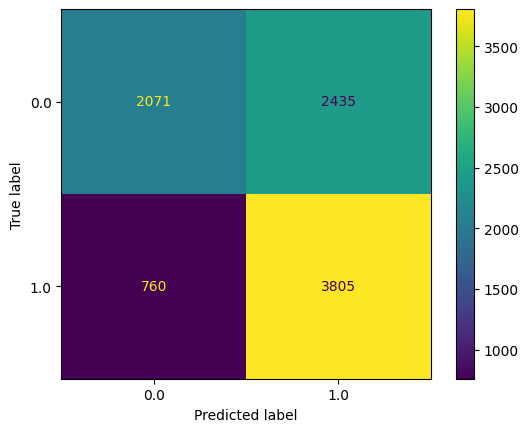

In [55]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_encoded, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [56]:
(3805+2071) / (3805+760+2071+2435)

0.6477786352111123

`Note` : The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

#### Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [58]:
# Create a classification report for the logistic regression model
target_labels = ["not verified", "verified"]
print(classification_report(y_test_encoded, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

not verified       0.73      0.46      0.56      4506
    verified       0.61      0.83      0.70      4565

    accuracy                           0.65      9071
   macro avg       0.67      0.65      0.63      9071
weighted avg       0.67      0.65      0.63      9071



`Note` : The classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 83%, and it achieved an accuracy of 65%.
<br> The precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting.
<br> The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

### **Task 4c. Interpret model coefficients**

In [63]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature": X_train_final.columns, "Coefficient": log_clf.coef_[0]})

,Feature,Coefficient
0,video_duration_sec,0.008287
1,video_view_count,-0.000002
2,video_share_count,0.000005
3,video_like_count,-0.000001
4,video_comment_count,0.000101
5,claim_status_opinion,0.000349
6,claim_status_nan,0.000027
7,author_ban_status_banned,-0.000014
8,author_ban_status_under review,-0.000001


### **Task 4d. Conclusion**

Key takeaways from the logistic regression model:
* The dataset has a few strong correlated variables, which might lead to multi-collinearity issues when fitting a logistic regression model. We decide to drop the `video_download_count` variable from the model.
* Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
* The logistic regression model had not very good performance, but acceptable predictive power. The model achieved a precision of 61% (not ideal) and a recall of 83% (very good), and it achieved an accuracy of 65%, which is towards the lower end of acceptable.